In [ ]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np
from numpy import random

import matplotlib.pyplot as plt

To consider the outermost region converged within 1%, we can let m0h be less than 60, and let big_nmk = 200.

Variation: Consider 10 heights. For each, randomly select 18 allowed wavenumbers. Then, for each region, create 6 random configurations (other regions in the configuration are well-proportioned). Run values 1-150 for the target region.

In [2]:
# Functions used to generate random variables for configurations.
def random_d_a(h, region):
  # need radwidth/(h-d) < 1
  d = []
  a = []
  rad_widths = []
  for i in range(3):
    if region == i: # no restrictions on dimensions except no overflow
      di = random.uniform(low = 0.0, high = (h - 1))
      rad_width_i = random.uniform(low = 0, high = (h - di))
    else: # restrictions in place for probably good convergence (wide)
      di = random.uniform(low = 0.0, high = (h - 4))
      rad_width_i = random.uniform(low = 3, high = (h - di))
    d.append(di)
    rad_widths.append(rad_width_i)
    a.append(sum(rad_widths))
  return d, a

def random_m0(h):
  # need m0 * h < 60
  return random.uniform(low=0.0, high=(60/h))

# Running with a better spread in the hmdr direction
def random_h_minus_d_a(h, region):
  # need radwidth/(h-d) < 1
  d = []
  a = []
  rad_widths = []
  for i in range(3):
    if i == region:
      h_minus_d_over_radwidth = random.uniform(low = 1., high = 200.)
      di = random.uniform(low = 0.0, high = (h - 1))
      rad_width_i = (h - di) / h_minus_d_over_radwidth
    else: # Want good convergence
      di = random.uniform(low = 0.0, high = (h - 4))
      rad_width_i = random.uniform(low = 3, high = (h - di))
    d.append(di)
    rad_widths.append(rad_width_i)
    a.append(sum(rad_widths))

  return d, a

In [3]:
# Code used to generate raw data.
file1 = "random_i_convergence.pkl"
file2 = "ratioed_regions.pkl"

hs = list(np.linspace(5, 50, 10))
big_nmk = 200
nmk_max = 150
NMK = [big_nmk] * 4
rho = 1023

# for h in hs:
#   m0s = []
#   mks = []
#   probs = []
#   prob_dicts = []
#   # Works out to find mks exactly once for each.
#   for region in range(3):
#     heaving = [0, 0, 0]
#     heaving[region] = 1
#     for i in range(6):
#       m0 = random_m0(h)
#       d, a = random_d_a(h, region)
#       prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
#       prob_dict = {"h" : h,
#                    "d" : d,
#                    "a" : a}
#       m0s.append(m0)
#       mks.append(prob.m_k)
#       probs.append(prob)
#       prob_dicts.append(prob_dict)
#   for i in range(18): # Go through each problem
#     prob = probs[i]
#     prob_dicts[i]["m0s"] = m0s
#     prob_dicts[i] = merge_dicts(prob_dicts[i], prob.convergence_study_over_m0s(nmk_max, m0s, mks))
#     print("Finished problem " + str(i))
#   all_prob_dicts = all_prob_dicts + prob_dicts
#   update_data_file(all_prob_dicts, file1)
#   print("Finished h = " + str(h))

# all_prob_dicts = []
# for h in hs:
#   m0s = []
#   mks = []
#   probs = []
#   prob_dicts = []
#   # Works out to find mks exactly once for each.
#   for region in range(3):
#     heaving = [0, 0, 0]
#     heaving[region] = 1
#     for i in range(6):
#       m0 = random_m0(h)
#       d, a = random_h_minus_d_a(h, region)
#       prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
#       prob_dict = {"h" : h,
#                    "d" : d,
#                    "a" : a,
#                    "region" : region}
#       m0s.append(m0)
#       mks.append(prob.m_k)
#       probs.append(prob)
#       prob_dicts.append(prob_dict)
#   for i in range(18): # Go through each problem
#     prob = probs[i]
#     prob_dicts[i]["m0s"] = m0s
#     prob_dicts[i] = merge_dicts(prob_dicts[i], prob.convergence_study_over_m0s(nmk_max, m0s, mks))
#     print("Finished problem " + str(i))
#   all_prob_dicts += prob_dicts
#   update_data_file(all_prob_dicts, file2)
#   print("Finished h = " + str(h))

In [8]:
# Extract data and add convergence metrics to the dictionaries
all_prob_dicts = open_pkl_file(file1)
generate_convergence_data(all_prob_dicts, [0.01, 0.005])
log_data = generate_log_data(all_prob_dicts)
dicts_by_region = [[prob_dict for prob_dict in all_prob_dicts if (prob_dict["region"] == region)] for region in [0, 1, 2]]

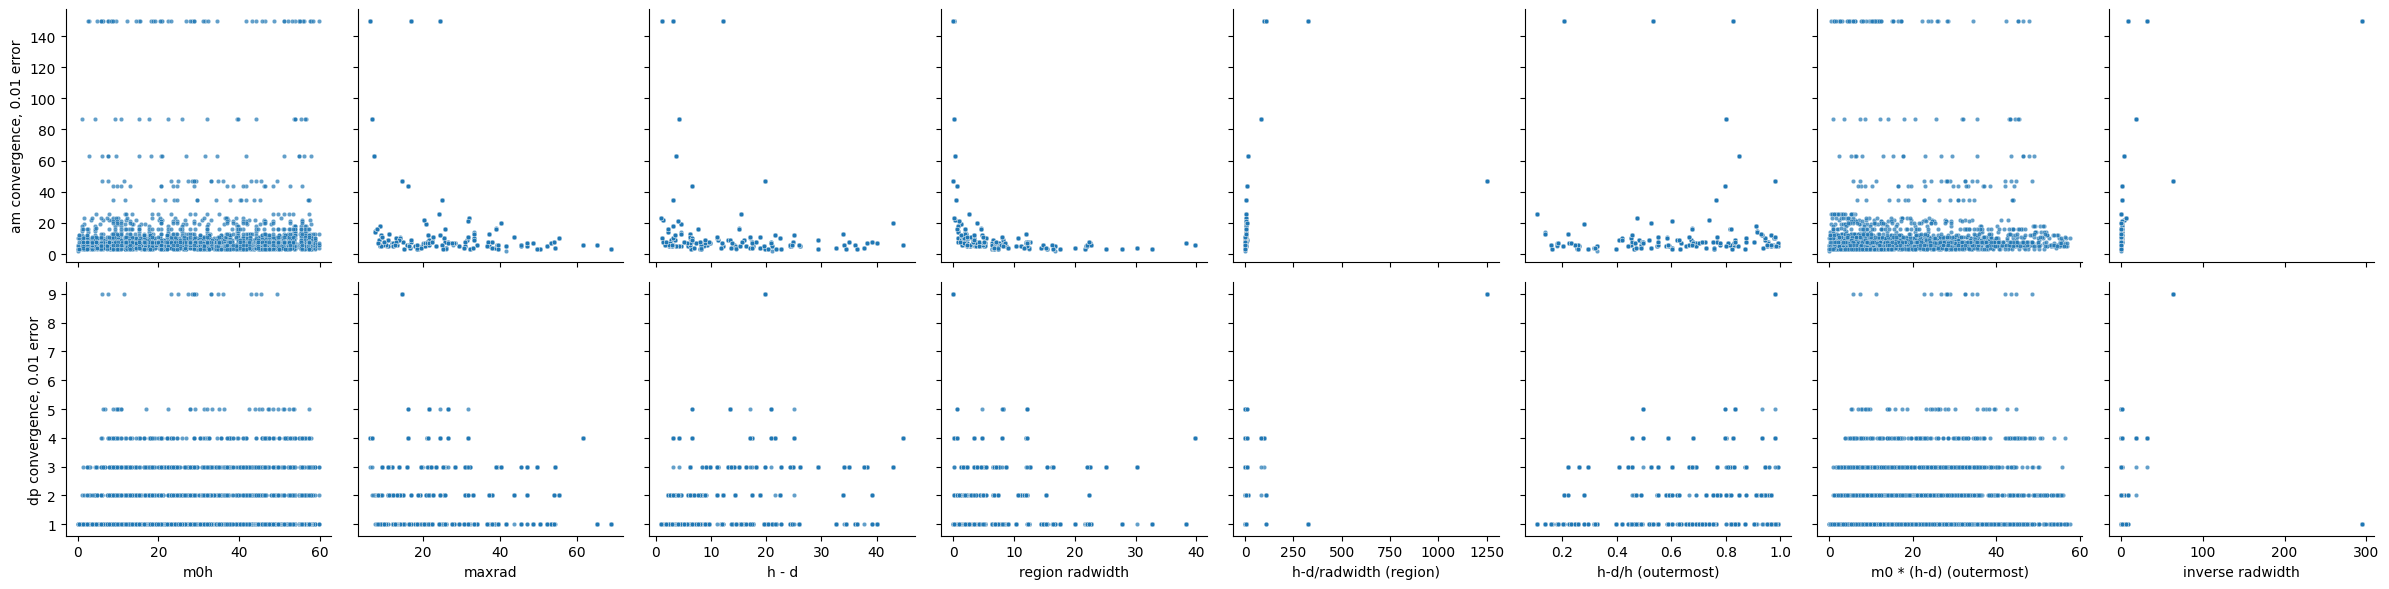

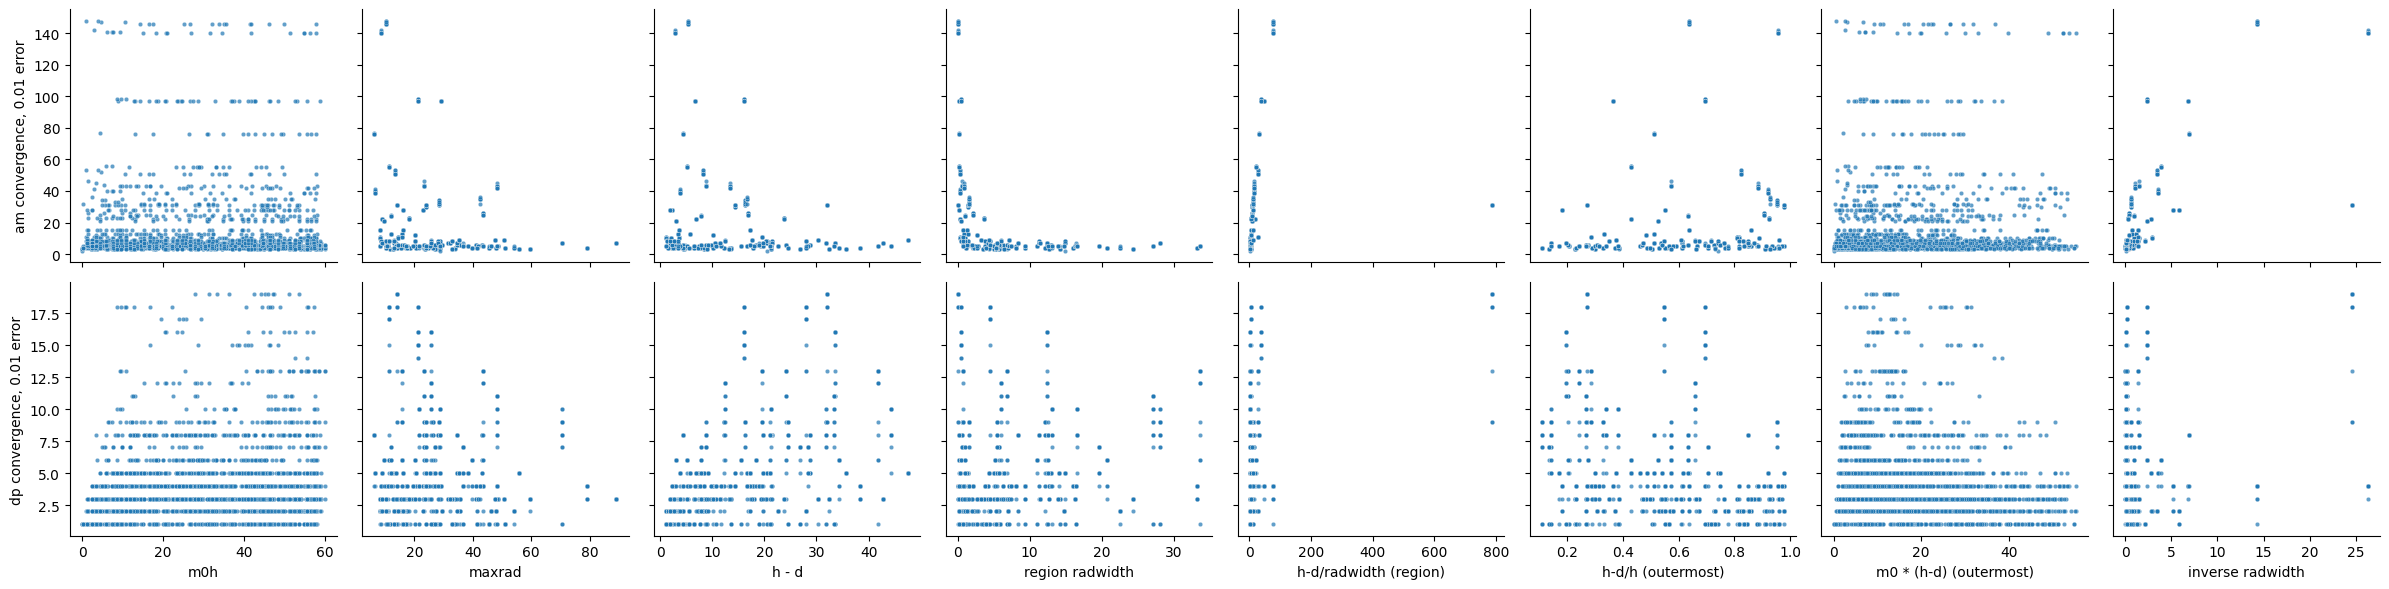

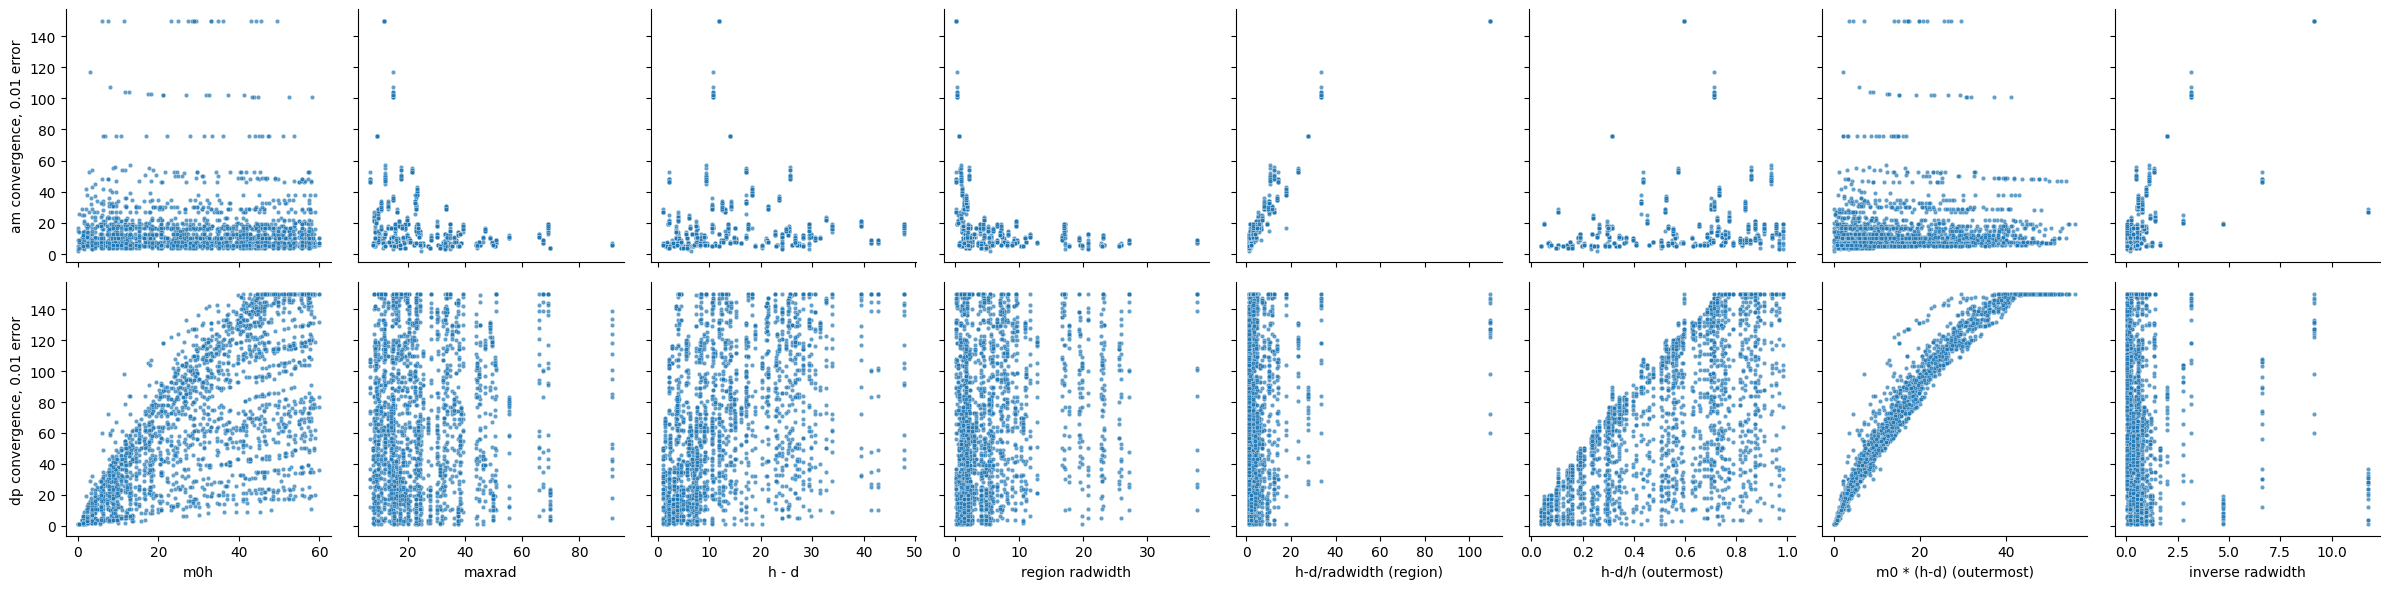

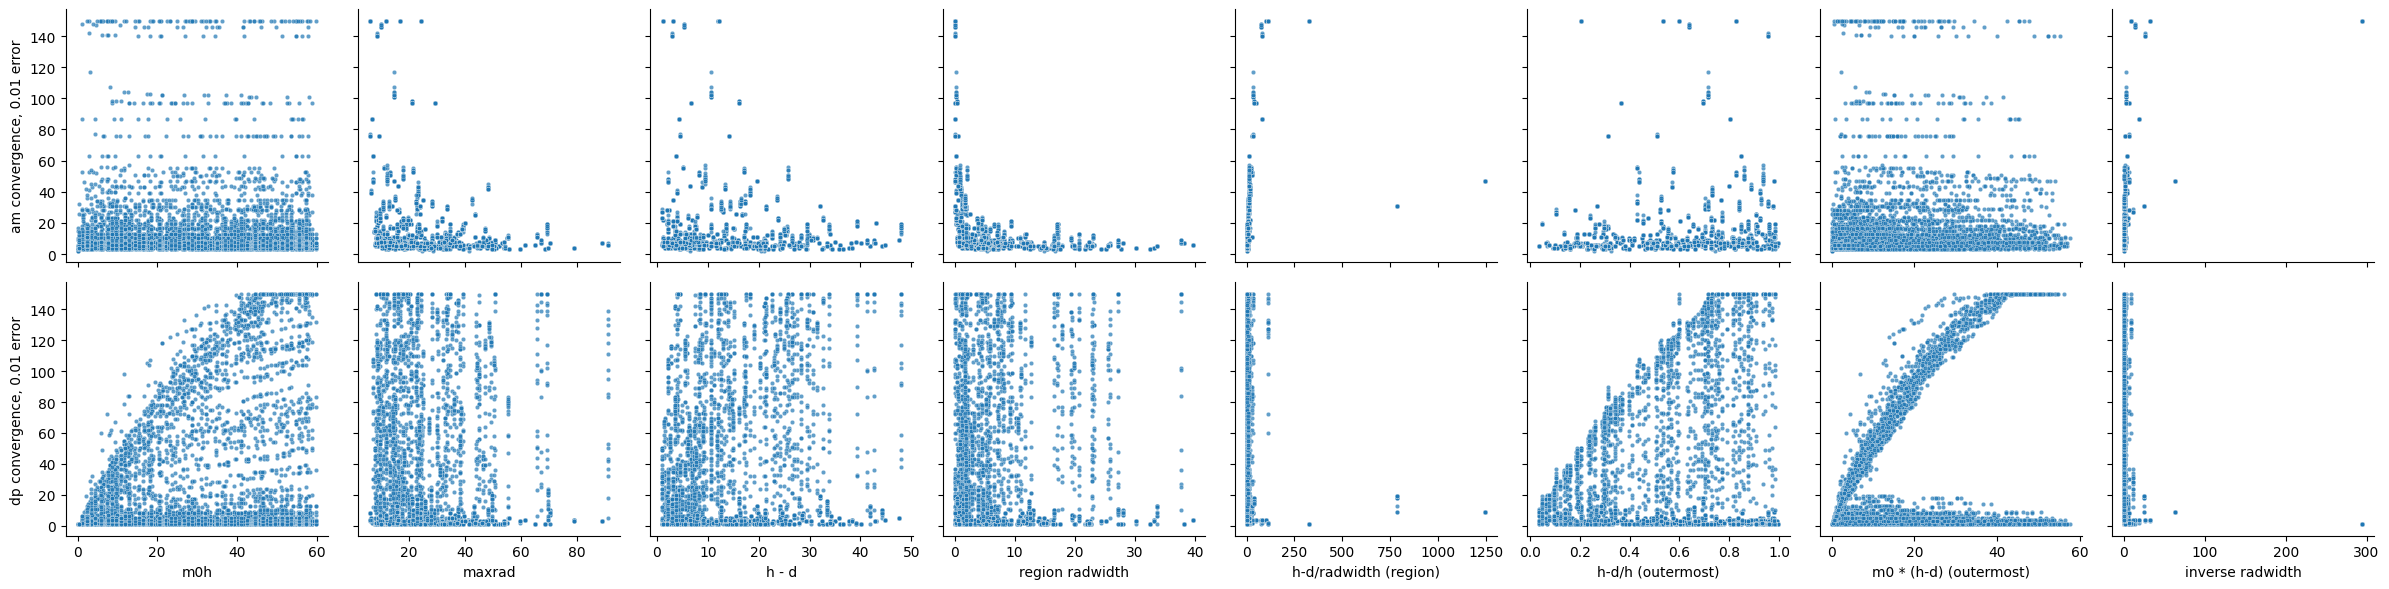

In [7]:
# Plot convergence point on y, m0, h, and m0h on x.
def xf1(config, m0):
  return config["h"]

def xf2(config, m0):
  return m0

def xf3(config, m0):
  return m0 * config["h"]

def xf4(config, m0):
  return (config["a"][-1])

def xf5(config, m0):
  return (config["h"] - config["d"][config["region"]])

def xf6(config, m0):
  region = config["region"]
  if region == 0:
    return config["a"][region]
  else:
    return config["a"][region] - config["a"][region - 1]
  
def xf7(config, m0):
  return config["a"][-1] - config["a"][-2]

def xf8(config, m0):
  radwidth = xf6(config, m0)
  return (config["h"] - config["d"][config["region"]])/radwidth

def xf9(config, m0):
  radwidth = xf7(config, m0)
  return (config["h"] - config["d"][-1])/radwidth

def xf10(config, m0):
  return (config["h"] - config["d"][-1])/(config["h"])

def xf11(config, m0):
  return (config["h"] - config["d"][-1]) * m0

def xf12(config, m0):
  radwidth = xf6(config, m0)
  return 1/radwidth

def yf1(config, m0):
  return config[m0]["convergence point 0.01 am"]

def yf2(config, m0):
  return config[m0]["convergence point 0.005 am"]

def yf3(config, m0):
  return config[m0]["convergence point 0.01 dp"]

def yf4(config, m0):
  return config[m0]["convergence point 0.005 dp"]

x_funcs = {#"h" : xf1,
          #  "m0" : xf2,
           "m0h" : xf3,
           "maxrad" : xf4,
           "h - d" : xf5,
           "region radwidth" : xf6,
          # "outermost radwidth" : xf7,
           "h-d/radwidth (region)" : xf8,
          #  "h-d/radwidth (outermost)" : xf9,
           "h-d/h (outermost)" : xf10,
           "m0 * (h-d) (outermost)" : xf11,
           "inverse radwidth" : xf12}
y_funcs = {"am convergence, 0.01 error" : yf1,
          #  "am convergence, 0.005 error" : yf2,
           "dp convergence, 0.01 error" : yf3,
          #  "dp convergence, 0.005 error" : yf4
           }

for i in [0, 1, 2]:
  plot_relation_grid(dicts_by_region[i], x_funcs, y_funcs)
plot_relation_grid(all_prob_dicts, x_funcs, y_funcs)

In [9]:
# variable metrics
def h_minus_d_over_radwidth(data_dict):
    region = data_dict["region"]
    radwidth = data_dict["a"][0] if region == 0 else (data_dict["a"][region] - data_dict["a"][region - 1])
    return (data_dict["h"] - data_dict["d"][region])/radwidth

def tall_theta(data_dict):
  hmdr = h_minus_d_over_radwidth(data_dict)
  return np.arctan(1/hmdr)

# Define adjacent height ratio functions
def left_ratio(data_dict):
    region = data_dict["region"]
    if region == 0: return None
    return (data_dict["h"] - data_dict["d"][region])/(data_dict["h"] - data_dict["d"][region - 1])

def right_ratio(data_dict):
    region = data_dict["region"]
    if region == len(data_dict["d"]) - 1:
       return (data_dict["h"] - data_dict["d"][region])/data_dict["h"]
    return (data_dict["h"] - data_dict["d"][region])/(data_dict["h"] - data_dict["d"][region + 1])

def left_uncovered_ratio(data_dict): # Fraction of left boundary with imperfect BC
    region = data_dict["region"]
    left_fluid_height = 0 if region == 0 else (data_dict["h"] - data_dict["d"][region - 1])
    self_fluid_height = (data_dict["h"] - data_dict["d"][region])
    if left_fluid_height < self_fluid_height:
      return left_fluid_height/self_fluid_height
    else:
      return 1
    
def right_uncovered_ratio(data_dict): # Fraction of right boundary with imperfect BC
    region = data_dict["region"]
    right_fluid_height = data_dict["h"] if region == 2 else (data_dict["h"] - data_dict["d"][region + 1])
    self_fluid_height = (data_dict["h"] - data_dict["d"][region])
    if right_fluid_height < self_fluid_height:
      return right_fluid_height/self_fluid_height
    else:
      return 1

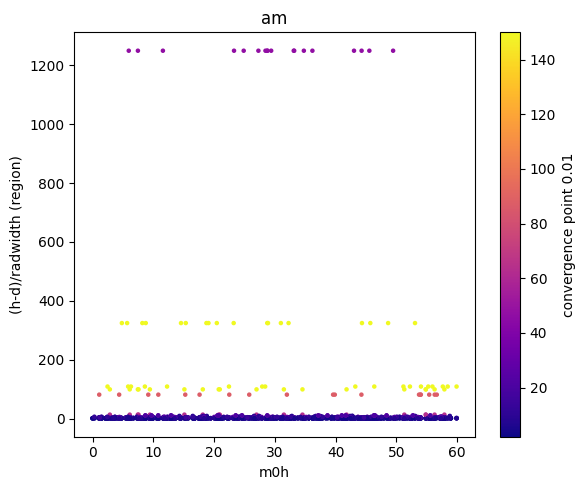

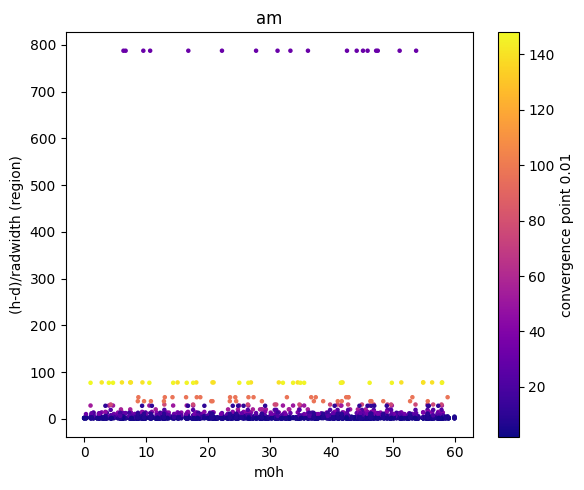

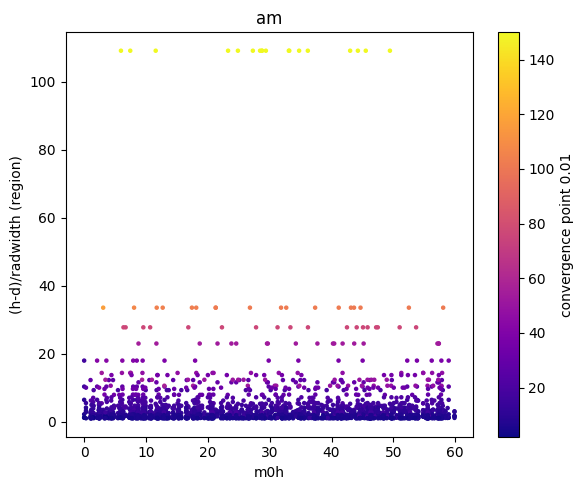

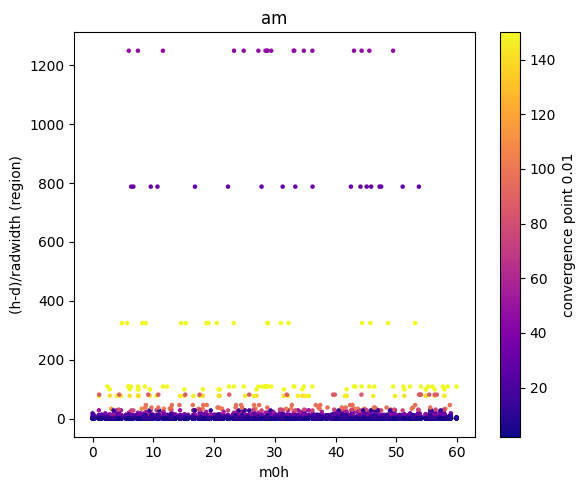

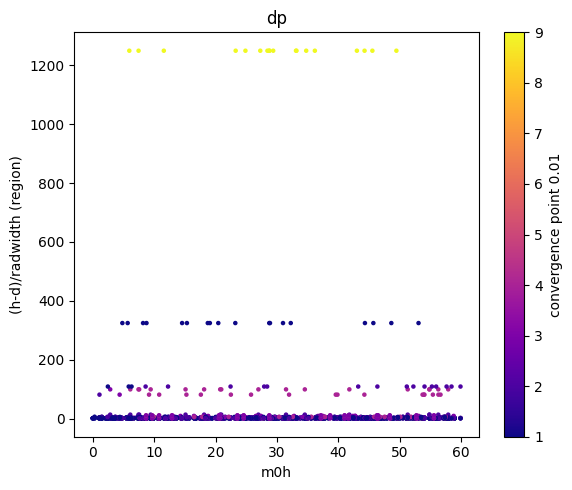

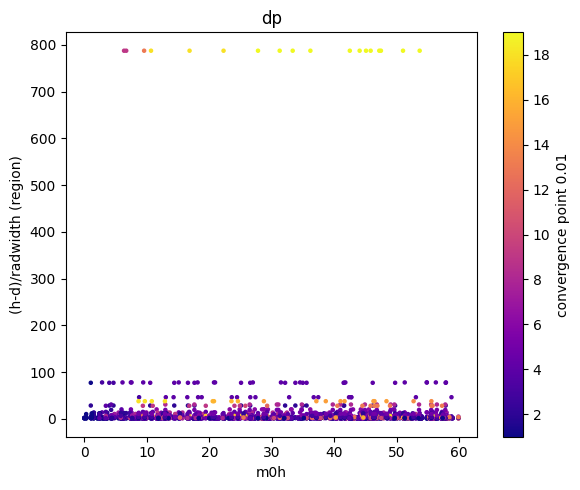

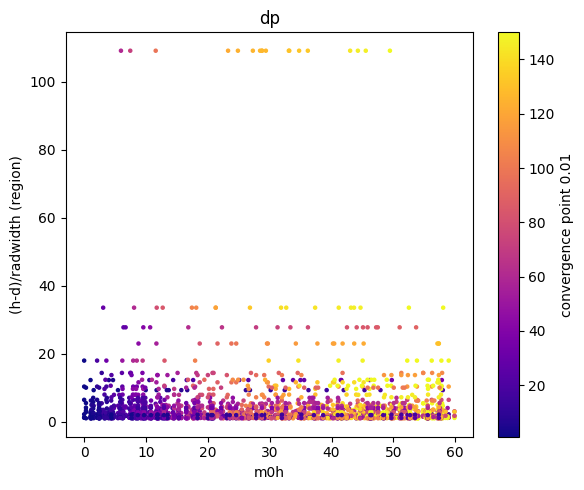

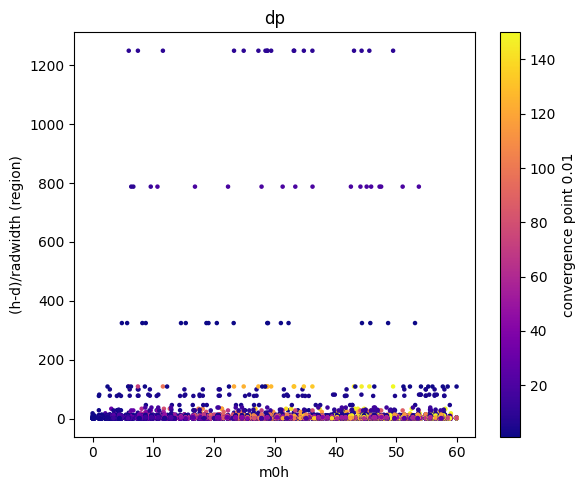

In [10]:
def plot_hydros_radwidth_m0h(data, hydro, error, theta_convention = False):
  xfunc = lambda data_dict, m0 : m0 * data_dict["h"]
  xlab = "m0h"
  if theta_convention:
    yfunc = lambda data_dict, m0 : tall_theta(data_dict)
    ylab = "theta"
  else: 
    yfunc = lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict)
    ylab = "(h-d)/radwidth (region)"
  plot_hydros_against_2(data, hydro, error, xfunc, yfunc, xlab, ylab)


convention = False

for i in range(3):
  plot_hydros_radwidth_m0h(dicts_by_region[i], "am", 0.01, theta_convention = convention)
plot_hydros_radwidth_m0h(all_prob_dicts, "am", 0.01, theta_convention = convention)

for i in range(3):
  plot_hydros_radwidth_m0h(dicts_by_region[i], "dp", 0.01,  theta_convention = convention)
plot_hydros_radwidth_m0h(all_prob_dicts, "dp", 0.01,  theta_convention = convention)

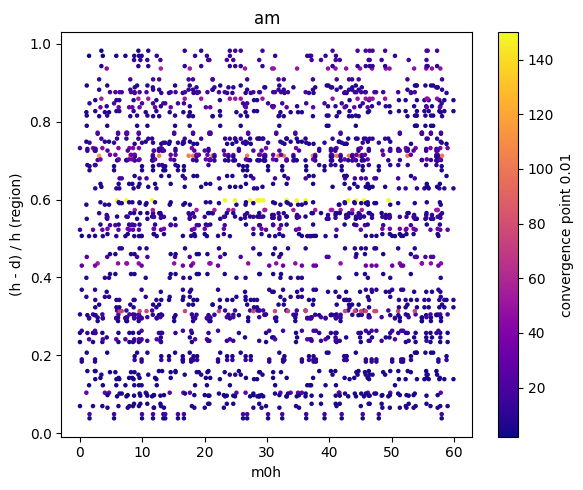

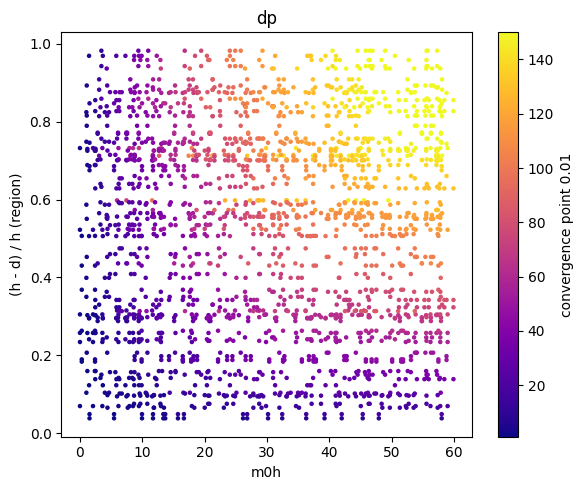

In [11]:
def plot_hydros_hmdh_m0h(data, hydro, error): # plots for outermost region
    xfunc = lambda data_dict, m0 : m0 * data_dict["h"]
    xlab = "m0h"
    yfunc = lambda data_dict, m0 : (data_dict["h"] - data_dict["d"][data_dict["region"]])/data_dict["h"]
    ylab = "(h - d) / h (region)"
    plot_hydros_against_2(data, hydro, error, xfunc, yfunc, xlab, ylab)

plot_hydros_hmdh_m0h(dicts_by_region[2], "am", 0.01)
plot_hydros_hmdh_m0h(dicts_by_region[2], "dp", 0.01)

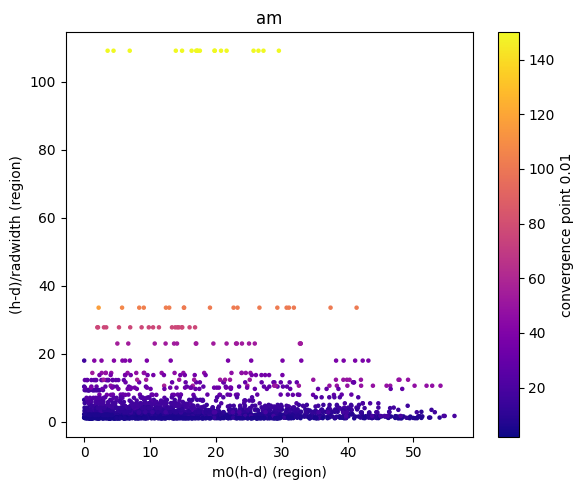

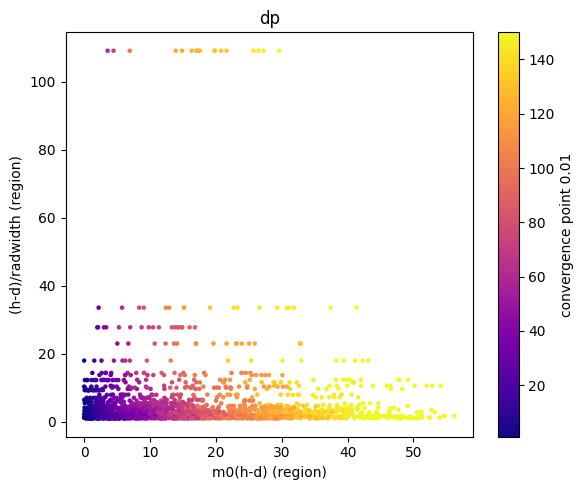

In [12]:
def plot_hydros_hmdr_hmdm0(data, hydro, error, theta_convention = False): # plots for outermost region
    xfunc = lambda data_dict, m0 : m0 * (data_dict["h"] - data_dict["d"][data_dict["region"]])
    xlab = "m0(h-d) (region)"
    if theta_convention:
        yfunc = lambda data_dict, m0 : tall_theta(data_dict)
        ylab = "theta"
    else: 
        yfunc = lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict)
        ylab = "(h-d)/radwidth (region)"
    plot_hydros_against_2(data, hydro, error, xfunc, yfunc, xlab, ylab)

convention = False
# Dual relation better shown with the file1 data set.
plot_hydros_hmdr_hmdm0(dicts_by_region[2], "am", 0.01, theta_convention = convention)
plot_hydros_hmdr_hmdm0(dicts_by_region[2], "dp", 0.01, theta_convention = convention)
# plot_hydros_hmdr_hmdm0(dicts_by_region[1], "am", 0.01, theta_convention = convention) # No relation
# plot_hydros_hmdr_hmdm0(dicts_by_region[1], "dp", 0.01, theta_convention = convention) # No relation

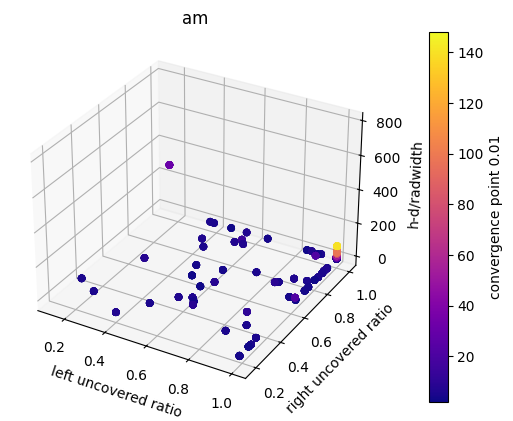

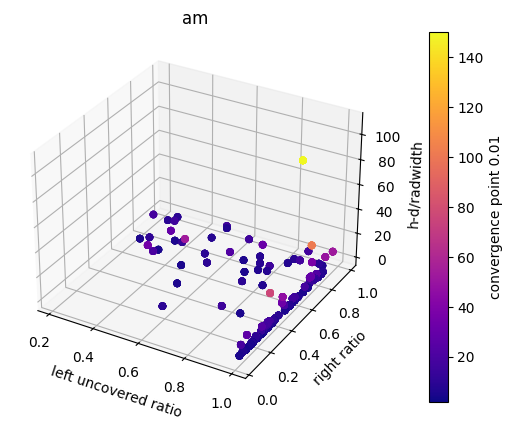

In [13]:
plot_hydros_against_3(dicts_by_region[1], "am", 0.01,
                      lambda prob, m0 : left_uncovered_ratio(prob),
                      lambda prob, m0 : right_uncovered_ratio(prob),
                      lambda prob, m0 : h_minus_d_over_radwidth(prob),
                      "left uncovered ratio", "right uncovered ratio", "h-d/radwidth")
plot_hydros_against_3(dicts_by_region[2], "am", 0.01,
                      lambda prob, m0 : left_uncovered_ratio(prob),
                      lambda prob, m0 : right_ratio(prob),
                      lambda prob, m0 : h_minus_d_over_radwidth(prob),
                      "left uncovered ratio", "right ratio", "h-d/radwidth")

In [14]:
def restriction1(data_dict, m0):
  if data_dict["region"] == 2 and m0 * data_dict["h"] > 50:
        return True
  else: return False

def restriction2(data_dict, m0):
  if (data_dict["region"] == 0 and
      tall_theta(data_dict) < 0.05):
        return True
  else: return False

def restriction3(data_dict, m0):
  if (data_dict["region"] == 1 and
      tall_theta(data_dict) < 0.05):
        return True
  else: return False

def cf1(data_dict, m0):
   return get_plasma_color(data_dict[m0]["convergence point 0.01 dp"], max_value = 150)

def cf2(data_dict, m0):
   return get_plasma_color(data_dict[m0]["convergence point 0.01 am"], max_value = 150)

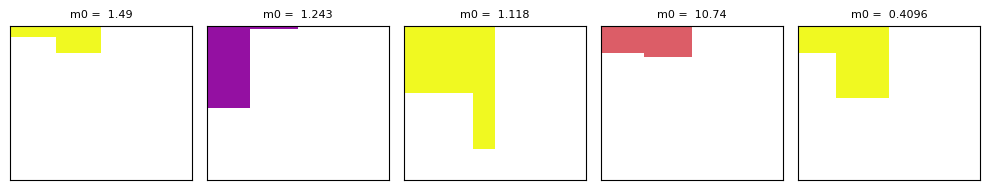

In [ ]:
first_m0_filter_and_plot_shapes(all_prob_dicts, restriction2, cf2, ppr = 5, figsize_per_plot = (2, 2))
# Oftentimes the important region is too skinny to see in these extreme cases.

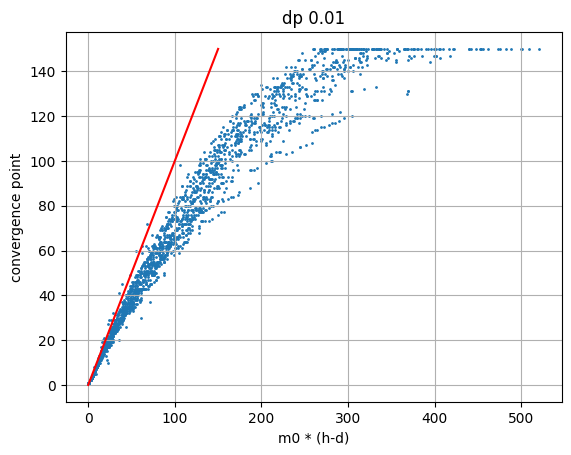

In [21]:
def dp_prediction1(data_dict, m0):
  f1 = 6
  t1 = m0 * (data_dict["h"] - data_dict["d"][data_dict["region"]])
  f2 = 0.2
  t2 = h_minus_d_over_radwidth(data_dict)
  return f1 * t1 * (t2 ** f2) # * t3

def am_prediction1(data_dict, m0):
  f1 = 100
  f2 = 1.5
  t2 = h_minus_d_over_radwidth(data_dict)
  return (t2 ** f2)


plot_hypothesis(dicts_by_region[2], "dp", 0.01, dp_prediction1, "m0 * (h-d)")
# plot_hypothesis(dicts_by_region[2], "am", 0.01, am_prediction1, "m0 * (h-d)")